## Import the necessary software libraries:

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from envs import Maze
from utils import plot_policy, plot_values, test_agent

## Initialize the environment

In [2]:
env = Maze()

2023-03-20 22:37:18.796 python[4325:99881] Warning: Expected min height of view: (<NSPopoverTouchBarItemButton: 0x7fa5a3ccd9e0>) to be less than or equal to 30 but got a height of 32.000000. This error will be logged once per view in violation.
2023-03-20 22:37:18.797 python[4325:99881] Warning: Expected min height of view: (<NSButton: 0x7fa5a3cefd90>) to be less than or equal to 30 but got a height of 32.000000. This error will be logged once per view in violation.
2023-03-20 22:37:18.798 python[4325:99881] Warning: Expected min height of view: (<NSPopoverTouchBarItemButton: 0x7fa5a3cf0030>) to be less than or equal to 30 but got a height of 32.000000. This error will be logged once per view in violation.
2023-03-20 22:37:18.798 python[4325:99881] Warning: Expected min height of view: (<NSPopoverTouchBarItemButton: 0x7fa5a3cf2e40>) to be less than or equal to 30 but got a height of 32.000000. This error will be logged once per view in violation.


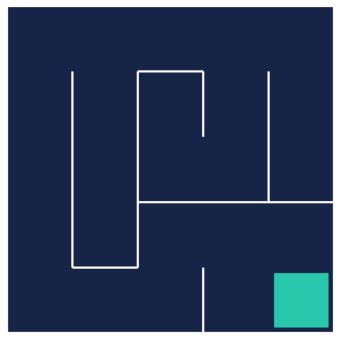

In [3]:
frame = env.render(mode='rgb_array')
plt.figure(figsize=(6,6))
plt.axis('off')
plt.imshow(frame)

In [4]:
print(f"Observation space shape: {env.observation_space.nvec}")
print(f"Number of actions: {env.action_space.n}")

Observation space shape: [5 5]
Number of actions: 4


## Define the policy $\pi(\cdot|s)$

#### Create the policy $\pi(\cdot|s)$

In [5]:
policy_probs = np.full((5, 5, 4), 0.25)

In [6]:
def policy(state):
    return policy_probs[state]

#### Test the policy with state (0, 0)

In [7]:
action_probabilities = policy((0,0))
for action, prob in zip(range(4), action_probabilities):
    print(f"Probability of taking action {action}: {prob}")

Probability of taking action 0: 0.25
Probability of taking action 1: 0.25
Probability of taking action 2: 0.25
Probability of taking action 3: 0.25


#### See how the random policy does in the maze

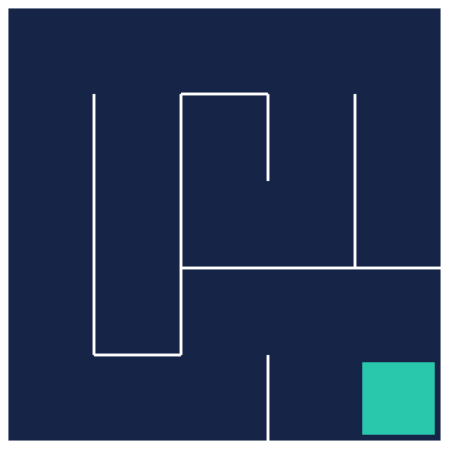

In [8]:
test_agent(env, policy, episodes=1)

#### Plot the policy

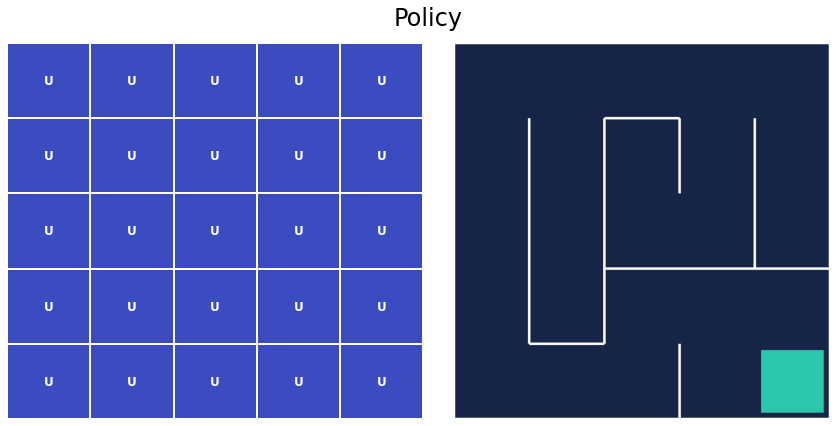

In [9]:
plot_policy(policy_probs, frame)

## Define value table $V(s)$

#### Create the $V(s)$ table

In [10]:
state_values = np.zeros(shape=(5,5))

#### Plot $V(s)$

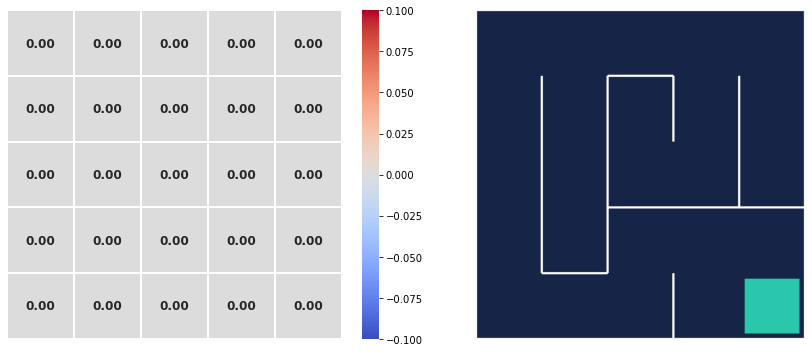

In [11]:
plot_values(state_values, frame)

## Implement the Value Iteration algorithm

</br>


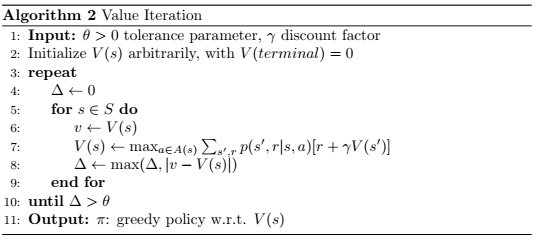

<div style="text-align:center">
    Adapted from Barto & Sutton: "Reinforcement Learning: An Introduction".
</div>

In [12]:
def value_iteration(policy_probs, state_values, theta=1e-6, gamma=0.99):
    delta = float('inf')

    while delta > theta:
        delta = 0
        for row in range(5):
            for col in range(5):
                old_value = state_values[(row, col)]
                action_probs = None
                max_qsa = float('-inf')

                for action in range(4):
                    next_state, reward, _, _ = env.simulate_step((row, col), action)
                    qsa = reward + gamma * state_values[next_state]
                    if qsa > max_qsa:
                        max_qsa = qsa
                        action_probs = np.zeros(4)
                        action_probs[action] = 1.

                state_values[(row, col)] = max_qsa
                policy_probs[(row, col)] = action_probs

                delta = max(delta, abs(max_qsa - old_value))

In [13]:
value_iteration(policy_probs, state_values)

## Show results

#### Show resulting value table $V(s)$

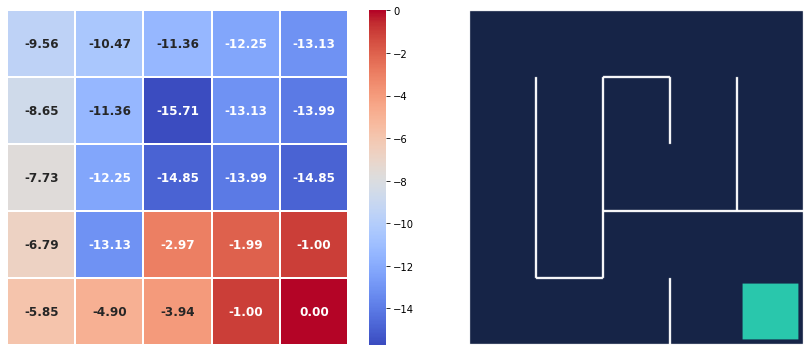

In [14]:
plot_values(state_values, frame)

#### Show resulting policy $\pi(\cdot|s)$

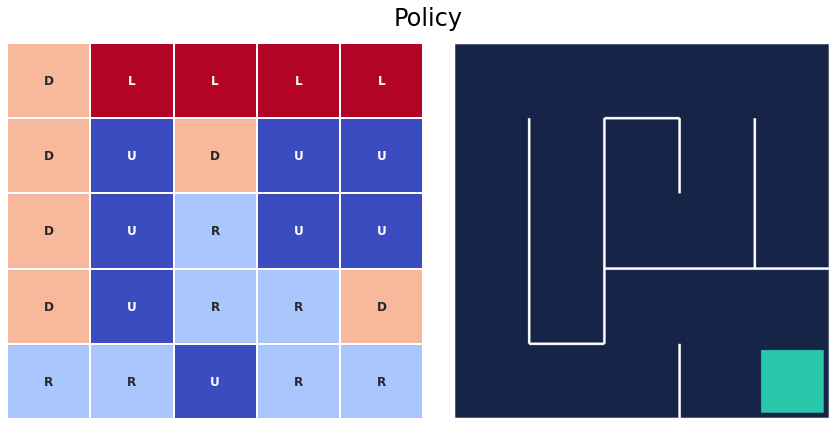

In [15]:
plot_policy(policy_probs, frame)

#### Test the resulting agent

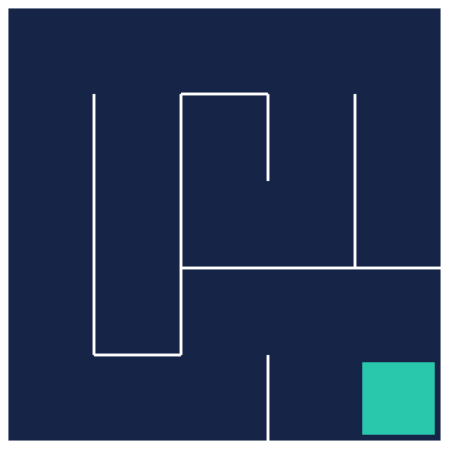

In [16]:
test_agent(env, policy)

## Resources

[[1] Reinforcement Learning: An Introduction. Ch. 4: Dynamic Programming](https://web.stanford.edu/class/psych209/Readings/SuttonBartoIPRLBook2ndEd.pdf)